#  Code by Aprilia DR

In [1]:
#importing Liabraries
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
from plotly import tools
from plotly.offline import iplot
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
from math import sqrt
import statsmodels.api as sm
#from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools  import adfuller
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import rcParams
from datetime import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline


#Graph Settings
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14


In [2]:
#importing Liabraries
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
from plotly import tools
from plotly.offline import iplot
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
from math import sqrt
import statsmodels.api as sm
#from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools  import adfuller
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acovf, acf
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


#Graph Settings
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14


# Import Dataset

In [3]:
df = pd.read_csv('C:/Users/April/OneDrive/Documents/0 CV APRIL-20210124T125347Z-001/super/Technical Test - Data Scientist/Technical Test - Data Scientist/Sales_Groceries.csv', encoding= 'unicode_escape')
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


## Understanding dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#missing value
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

lebih dari 30% data customer tidak diketahui, dan 0.4% description tidak diketahui. sehingga perlu dilakukan **imputasi** lebih lanjut

In [7]:
#check null value pada Description dan CustomerID
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [8]:
df[df.Description.isnull()].CustomerID.value_counts()

Series([], Name: CustomerID, dtype: int64)

In [9]:
df[df.Description.isnull()].UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

Insight: 
1. Ketika data pada Description adalah null, data pada CustomerID dan UnitPrice juga null. Sehingga nanti akan di drop karena tidak ada keterangan lebih lanut dan tidak memberikan insight lebih lanjut.

In [10]:
#check data InvoiceNo
df.InvoiceNo.value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [11]:
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Insight: 

1. Terdapat beberapa data pada InvoiceNo yang berawalan huruf 'C', karena berbeda dengan data yang lain, huruf 'C' dapat dianggap sign untuk cancelled
2. Cancelled invoice mempunyai quantity negatif
3. Data pada StockCode memiliki tipe 5 digit numeric dan letter

In [12]:
#check data letter type StockCode
df[df.StockCode.str.contains("^[a-zA-Z]")].StockCode.value_counts()

POST            1256
DOT              710
M                571
C2               144
D                 77
S                 63
BANK CHARGES      37
AMAZONFEE         34
CRUK              16
DCGSSGIRL         13
DCGSSBOY          11
gift_0001_20      10
gift_0001_10       9
gift_0001_30       8
DCGS0003           5
gift_0001_50       4
PADS               4
gift_0001_40       3
B                  3
DCGS0069           2
DCGS0070           2
DCGS0076           2
DCGS0072           1
DCGS0074           1
DCGS0057           1
m                  1
DCGS0004           1
DCGS0073           1
DCGS0071           1
DCGS0068           1
DCGS0067           1
DCGS0066P          1
DCGS0055           1
Name: StockCode, dtype: int64

In [13]:
df[df.StockCode.str.contains("^[a-zA-Z]")].Description.value_counts()

POSTAGE                                1252
DOTCOM POSTAGE                          709
Manual                                  572
CARRIAGE                                143
Discount                                 77
SAMPLES                                  63
Bank Charges                             37
AMAZON FEE                               34
CRUK Commission                          16
GIRLS PARTY BAG                          13
BOYS PARTY BAG                           11
Dotcomgiftshop Gift Voucher £20.00        9
Dotcomgiftshop Gift Voucher £10.00        8
Dotcomgiftshop Gift Voucher £30.00        7
ebay                                      5
BOXED GLASS ASHTRAY                       4
PADS TO MATCH ALL CUSHIONS                4
Dotcomgiftshop Gift Voucher £50.00        4
Dotcomgiftshop Gift Voucher £40.00        3
Adjust bad debt                           3
SUNJAR LED NIGHT NIGHT LIGHT              2
CAMOUFLAGE DOG COLLAR                     1
OOH LA LA DOGS COLLAR           

Insight: 
1. Umunya StockCode memiliki 5 digit numeric, namun ada juga yang bertipe string / letter, dan > 6 digit
2. Jumlah data pada Description lebih banyak dibanding StockCode, hal ini dapat berarti retailer menjual banyak tipe product

In [14]:
#check Stockcode yang punya > 1 description 
df.groupby("StockCode")["Description"].nunique()[df.groupby("StockCode")["Description"].nunique() != 1]

StockCode
10080           2
10123G          0
10133           2
10134           0
15058A          2
               ..
DCGS0069        2
DCGS0071        0
DCGS0072        0
DCGS0074        0
gift_0001_20    2
Name: Description, Length: 762, dtype: int64

Insight:
Terdapat 762 StockCode memiliki description lebih dari 1

In [15]:
# Check StockCode yang memiliki > 5 digit numeric
df[df.StockCode.str.len() > 5].StockCode.value_counts()

85123A    2313
85099B    2159
85099C     960
82494L     943
85099F     842
          ... 
84251F       1
35603B       1
46037A       1
84251J       1
47591b       1
Name: StockCode, Length: 1114, dtype: int64

In [16]:
df[df.StockCode.str.len() > 5].Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
JUMBO BAG RED RETROSPOT               2159
WOODEN FRAME ANTIQUE WHITE             999
JUMBO  BAG BAROQUE BLACK WHITE         960
JUMBO BAG STRAWBERRY                   850
                                      ... 
OCEAN STRIPE HAMMOCK                     1
ORANGE/FUSCHIA STONES NECKLACE           1
Adjustment                               1
LILAC FEATHERS CURTAIN                   1
OCEAN SCENT CANDLE JEWELLED DRAWER       1
Name: Description, Length: 1005, dtype: int64

In [17]:
#check Country
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [18]:
#Check UnitPrice
df['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [19]:
df[df.UnitPrice <= 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 622 to 538919
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    2517 non-null   object 
 1   StockCode    2517 non-null   object 
 2   Description  1063 non-null   object 
 3   Quantity     2517 non-null   int64  
 4   InvoiceDate  2517 non-null   object 
 5   UnitPrice    2517 non-null   float64
 6   CustomerID   40 non-null     float64
 7   Country      2517 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 177.0+ KB


insight: 
1. terdapat 2517 data yang memiliki unitprice <= 0, sebagian CUstomerID dan Description juga null pada data tersebut, sehingga nanti akan di drop
2. min -11062, max 38970, 75% 4.13 = terdapat outlier

In [20]:
#Check quantity
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [21]:
df[df.Quantity <= 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10624 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10624 non-null  object 
 1   StockCode    10624 non-null  object 
 2   Description  9762 non-null   object 
 3   Quantity     10624 non-null  int64  
 4   InvoiceDate  10624 non-null  object 
 5   UnitPrice    10624 non-null  float64
 6   CustomerID   8905 non-null   float64
 7   Country      10624 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 747.0+ KB


insight: 
1. Terdapat 10624 data yang memiliki quantity <= 0, quantity negatif menunjukkan canellation sehingga nantinya akan di drop
2. min -80995, max 80995 = terdapat outlier

# EDA

**StockCode dan Description** 

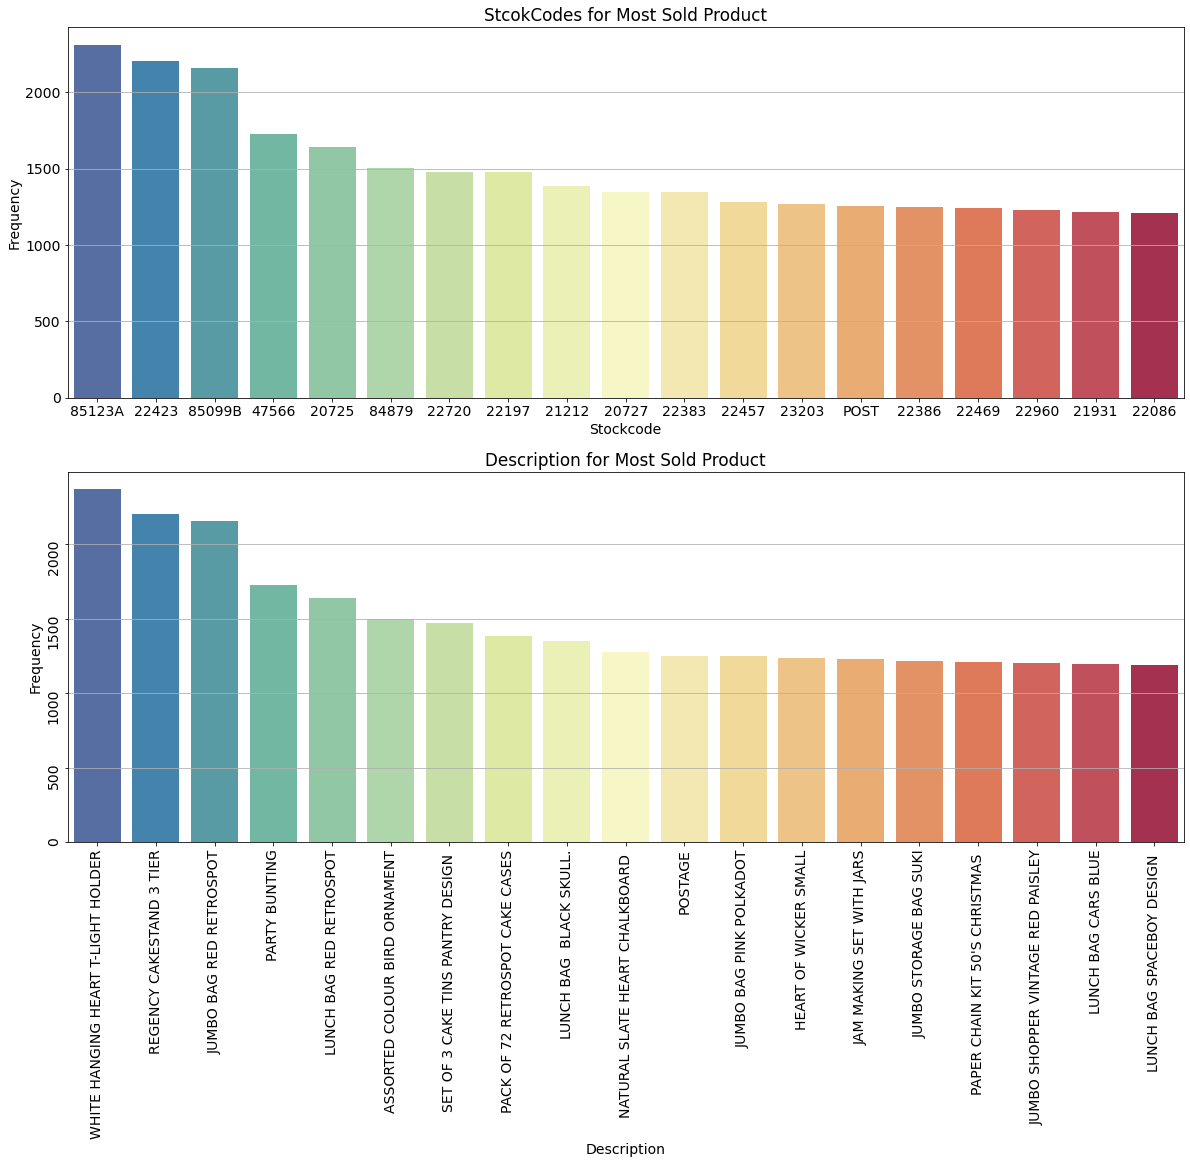

In [22]:
#Check StockCode dan Description 
stockcode_frequency = df.StockCode.value_counts().sort_values(ascending=False)
description_frequency = df.Description.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_frequency.iloc[0:19].index,
            stockcode_frequency.iloc[0:19].values,
            ax = ax[0], palette='Spectral_r')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Stockcode')
ax[0].set_title('StcokCodes for Most Sold Product');
sns.barplot(description_frequency.iloc[0:19].index,
            description_frequency.iloc[0:19].values,
            ax = ax[1], palette='Spectral_r')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Description')
ax[1].tick_params(labelrotation=90)

ax[1].set_title('Description for Most Sold Product');

**Customer and Countries**

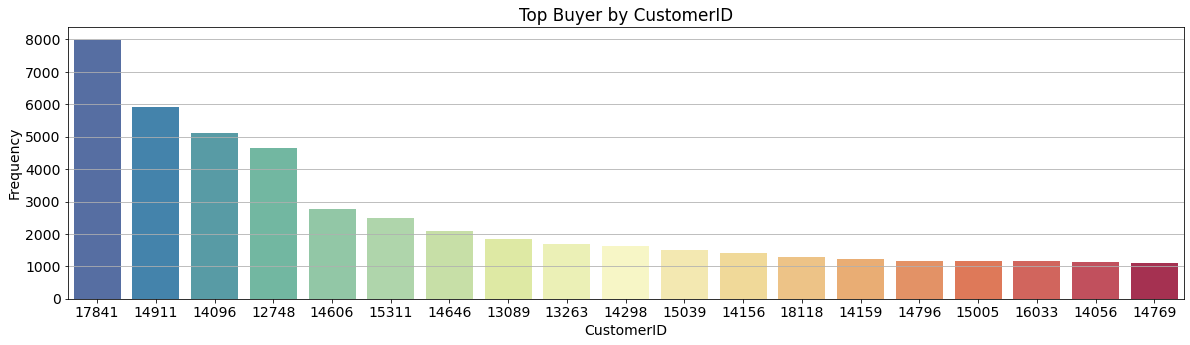

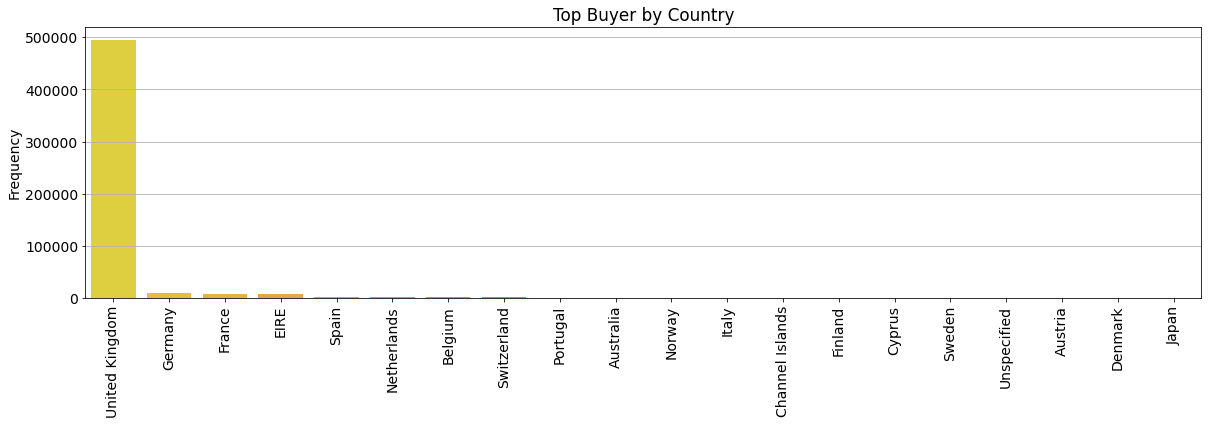

In [23]:
customer_frequency = df.CustomerID.value_counts().sort_values(ascending=False).iloc[0:19] 
plt.figure(figsize=(20,5))
customer_frequency.index = customer_frequency.index.astype('Int64') 
sns.barplot(customer_frequency.index, customer_frequency.values, order=customer_frequency.index, palette='Spectral_r')
plt.ylabel('Frequency')
plt.xlabel('CustomerID')
plt.title('Top Buyer by CustomerID');

country_frequency = df.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_frequency.index, country_frequency.values, palette='plasma_r')
plt.ylabel('Frequency')
plt.title('Top Buyer by Country')
plt.xticks(rotation=90);

**UnitPrice and Quanity**

In [24]:
#plot unit price
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [25]:
#remove value < 0
df2 = df.loc[df.UnitPrice > 0].copy()

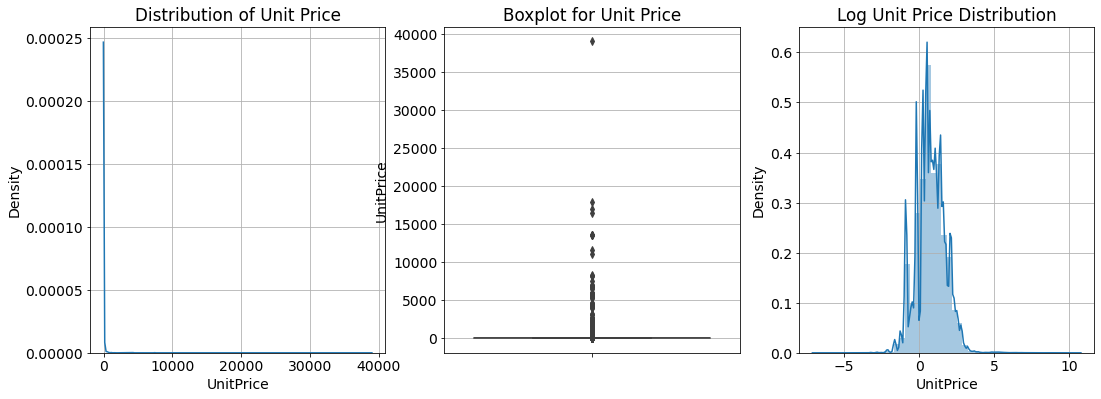

In [26]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.kdeplot(df2['UnitPrice'], ax = axes[0]).set_title('Distribution of Unit Price')
sns.boxplot(y = df2['UnitPrice'], ax = axes[1]).set_title('Boxplot for Unit Price')
sns.distplot(np.log(df2['UnitPrice']), ax = axes[2]).set_title('Log Unit Price Distribution')

plt.show()

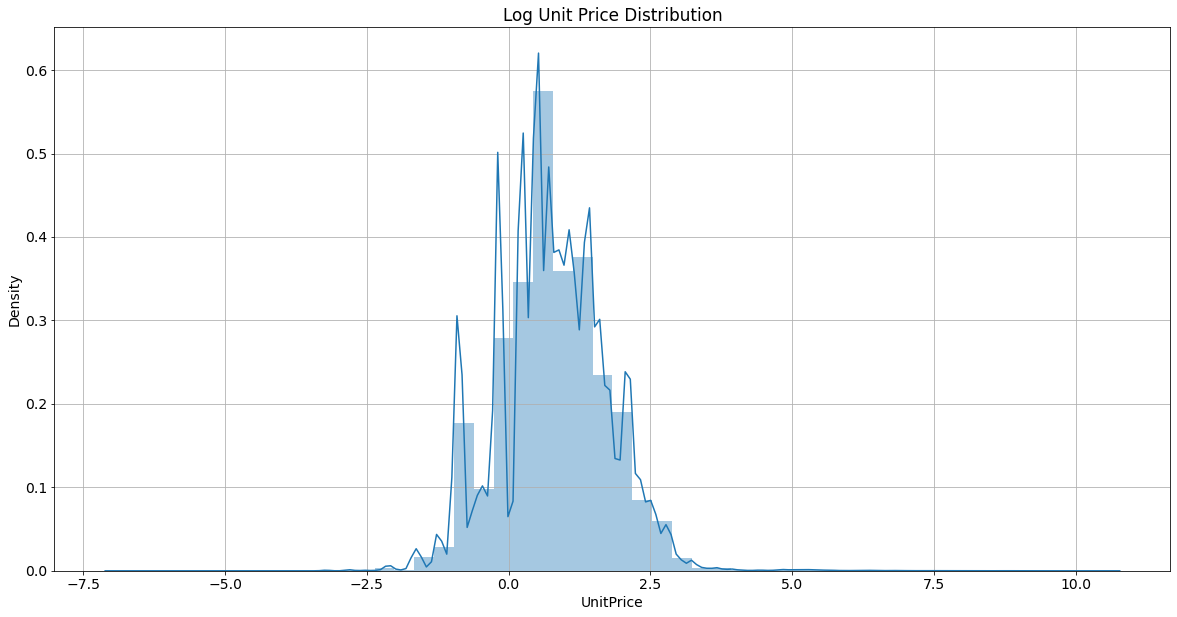

In [27]:
plt.figure(figsize = (20,10))

sns.distplot(np.log(df2['UnitPrice'])).set_title('Log Unit Price Distribution')
plt.show()

insight:

    1. Nilai unit price cenderung kecil
    2. Nilai outliers sangat besar
    3. Log unit price distirbution plot memperlihatkan kebanyakan data tersebar pada exponensial -2.5 hingga 3

In [28]:
#menentukan lower limit dan upper limit untuk menghilangkan outlier
print('Lower limit for UnitPrice: ' + str(np.exp(-2.5)))
print('Upper limit for UnitPrice: ' + str(np.exp(3)))

Lower limit for UnitPrice: 0.0820849986238988
Upper limit for UnitPrice: 20.085536923187668


In [29]:
df2 = df2.loc[(df2.UnitPrice > 0.1) & (df2.UnitPrice < 20)].copy()
df2.UnitPrice.describe()

count    534906.000000
mean          3.152416
std           3.055413
min           0.110000
25%           1.250000
50%           2.080000
75%           4.130000
max          19.960000
Name: UnitPrice, dtype: float64

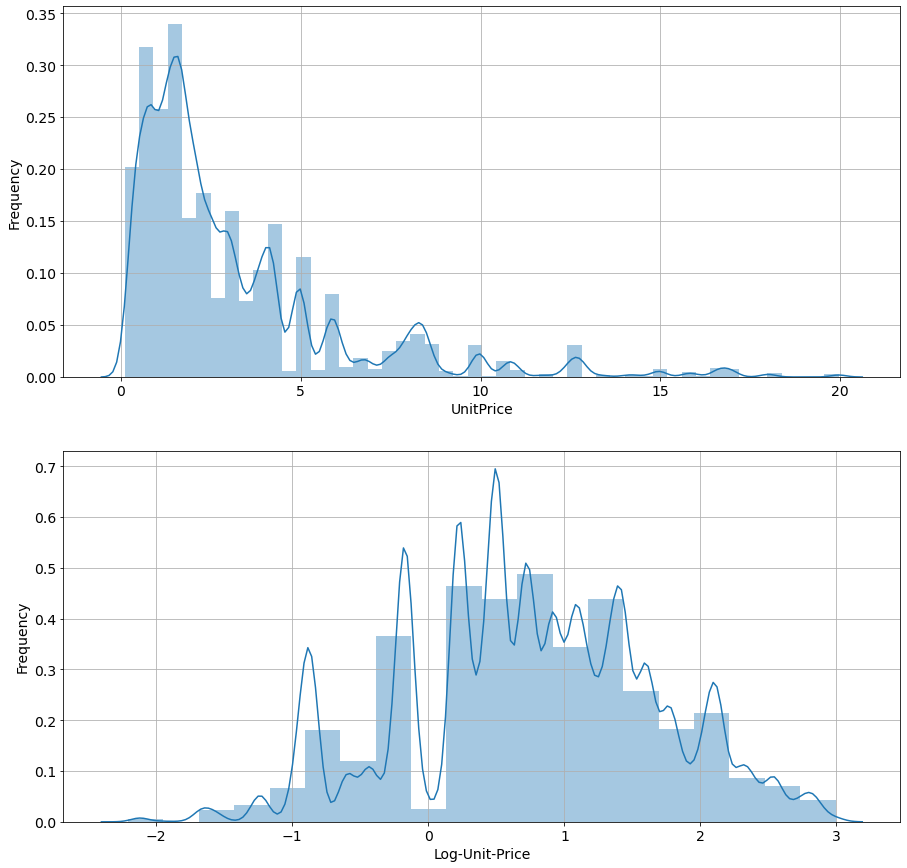

In [30]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(df2.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency');

sns.distplot(np.log(df2.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

In [31]:
#plot quantity
df2.Quantity.describe()

count    534906.000000
mean          9.869132
std         215.805073
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

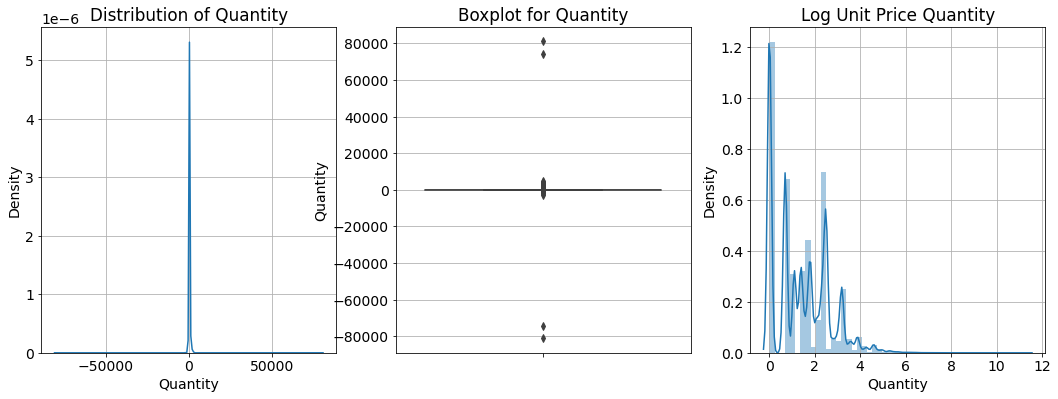

In [32]:
#plot sebelum dihilangkan outlier
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.kdeplot(df2['Quantity'], ax = axes[0]).set_title('Distribution of Quantity')
sns.boxplot(y = df2['Quantity'], ax = axes[1]).set_title('Boxplot for Quantity')
sns.distplot(np.log(df2['Quantity']), ax = axes[2]).set_title('Log Unit Price Quantity')

plt.show()

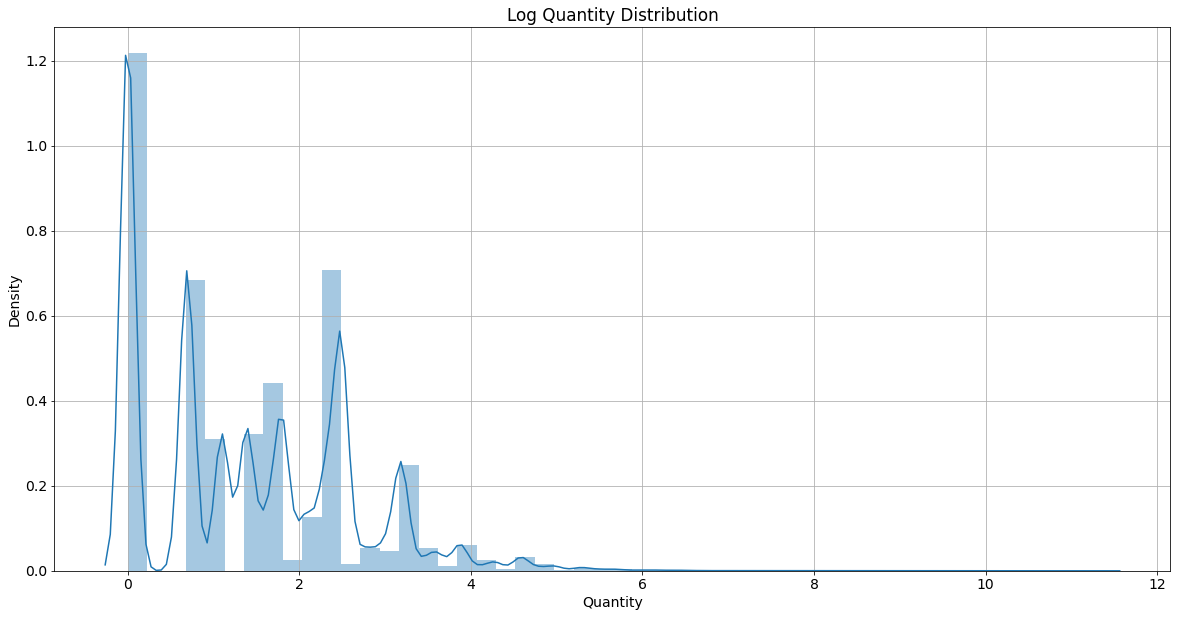

In [33]:
plt.figure(figsize = (20,10))

sns.distplot(np.log(df2['Quantity'])).set_title('Log Quantity Distribution')
plt.show()

In [34]:
#menentukan lower limit dan upper limit untuk menghilangkan outlier
print('Lower limit for Quantity: ' + str(np.exp(0)))
print('Upper limit for Quantity: ' + str(np.exp(5)))

Lower limit for Quantity: 1.0
Upper limit for Quantity: 148.4131591025766


In [35]:
df4 = df2.loc[(df2.Quantity >= 1) & (df2.Quantity < 149)].copy()
df4.Quantity.describe()

count    523279.000000
mean          8.441835
std          14.709452
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max         148.000000
Name: Quantity, dtype: float64

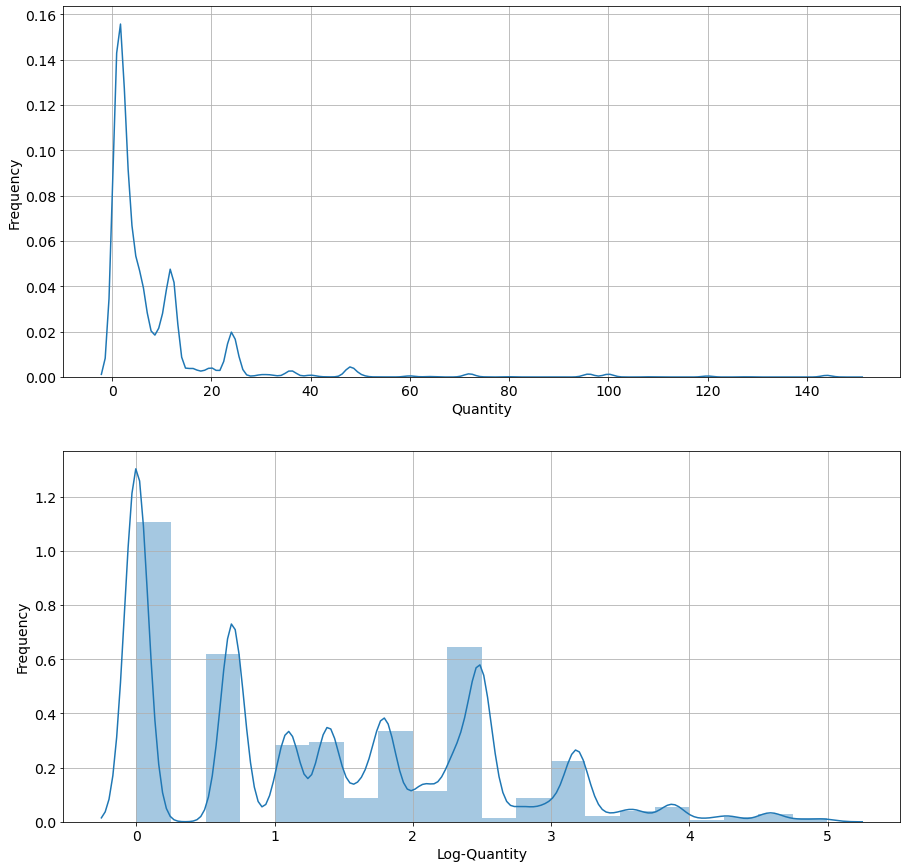

In [36]:
#plot setelah dihilangkan outlier
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.kdeplot(df4.Quantity, ax=ax[0])
ax[0].set_ylabel('Frequency');

sns.distplot(np.log(df4.Quantity), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

# Feature Engineering

## Drop cancellation

In [37]:
df4[df4['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Tidak ada lagi data cancellation karena termasuk outlier**

## Change InvoiceDate datatype

In [38]:
df4['InvoiceDate'] = pd.to_datetime(df4['InvoiceDate'])

In [39]:
print('First observation on data is ', df4.InvoiceDate.min())
print('Last observation on data is ', df4.InvoiceDate.max())

print(f"We have {(df4.InvoiceDate.max() - df4.InvoiceDate.min()).days} days")

First observation on data is  2010-12-01 08:26:00
Last observation on data is  2011-12-09 12:50:00
We have 373 days


In [40]:
#Create feature detailed invoicedate

df4['Year'] = df4.InvoiceDate.dt.year
df4['Quarter'] = df4.InvoiceDate.dt.quarter
df4['Month'] = df4.InvoiceDate.dt.month
df4['Week'] = df4.InvoiceDate.dt.week
df4['Weekday'] = df4.InvoiceDate.dt.weekday
df4['Day'] = df4.InvoiceDate.dt.day
df4['Dayofyear'] = df4.InvoiceDate.dt.dayofyear
df4['Dayofweek'] = df4['InvoiceDate'].dt.day_name()
df4['Date'] = pd.to_datetime(df4[['Year', 'Month', 'Day']])

In [41]:
df4.Dayofweek.value_counts()

Thursday     99548
Tuesday      97970
Monday       91836
Wednesday    91099
Friday       79198
Sunday       63628
Name: Dayofweek, dtype: int64

## Create feature Revenue

In [42]:
df4['Revenue'] = df4['Quantity'] * df4['UnitPrice']

In [43]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Dayofweek,Date,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,4,12,48,2,1,335,Wednesday,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,4,12,48,2,1,335,Wednesday,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,4,12,48,2,1,335,Wednesday,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,4,12,48,2,1,335,Wednesday,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,4,12,48,2,1,335,Wednesday,2010-12-01,20.34


In [44]:
df5 = pd.DataFrame(df4.groupby('Date').sum().resample("D").sum()['Revenue'])
df5

,Revenue
Date,
2010-12-01,49522.73
2010-12-02,41298.73
2010-12-03,42051.19
2010-12-04,0.00
2010-12-05,30598.76
...,...
2011-12-05,71979.22
2011-12-06,51032.80
2011-12-07,52187.30


In [45]:
df5['Dayofweek'] = df5.index.day_name()
df5.head()

,Revenue,Dayofweek
Date,,
2010-12-01,49522.73,Wednesday
2010-12-02,41298.73,Thursday
2010-12-03,42051.19,Friday
2010-12-04,0.00,Saturday
2010-12-05,30598.76,Sunday


In [46]:
df5.groupby('Dayofweek').Revenue.sum()

Dayofweek
Friday       1378613.60
Monday       1422493.48
Saturday           0.00
Sunday        765349.04
Thursday     1772792.57
Tuesday      1652490.70
Wednesday    1560867.73
Name: Revenue, dtype: float64

Revenue pada hari Sabtu adalah 0, kemungkinan retail tutup pada hari Sabtu. Sehingga revenue untuk hari Sabtu (Saturday) akan di exclude

In [47]:
df5_workdays = df5[df5.Revenue > 0].copy()
df5_workdays.drop('Dayofweek', axis = 1, inplace = True)

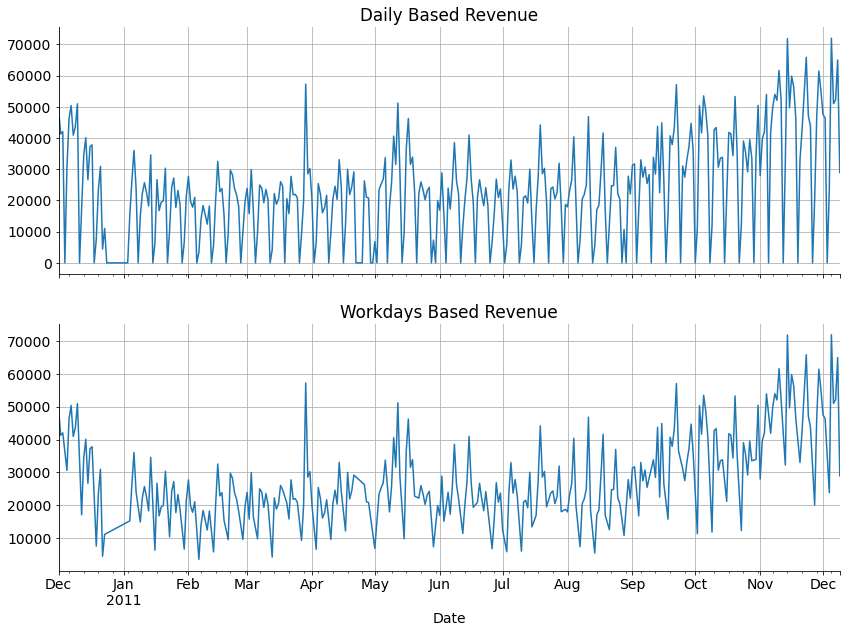

In [48]:
fig, axes = plt.subplots(2, 1, sharex = True, figsize = (14, 10))

df5.Revenue.plot(ax = axes[0]).set_title('Daily Based Revenue')
df5_workdays.Revenue.plot(ax = axes[1]).set_title('Workdays Based Revenue')

sns.despine()
plt.show()

# Stationary test for time series data

Rolling mean test



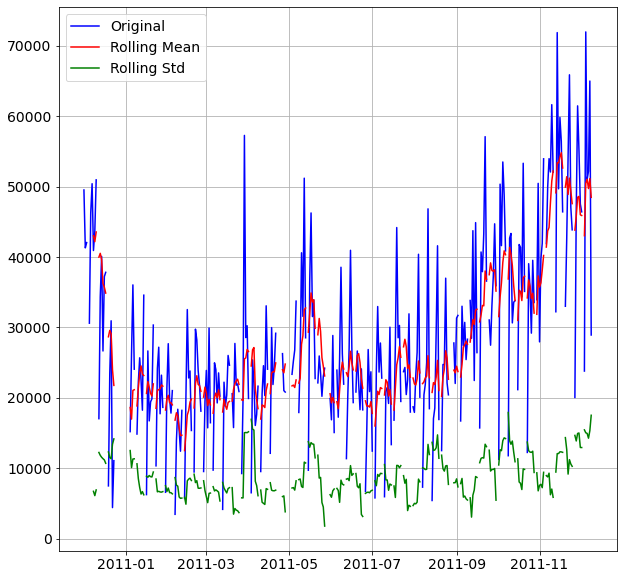

Dickey-Fuller test

H0: (timeseries) is non-stationary.
H1: (timeseries) is stationary.

ADF test statistic: -1.1006251883955844
p-value: 0.7148225228652769
Number of lags: 13

Critical Values : 

	 1% 	 -3.4530232710482367
	 5% 	 -2.871523926671883
	 10% 	 -2.5720897694878424

For 0.05 significance level: 

Reject null hypothesis. This series is non-stationary.


In [49]:
# Function to test the stationarity
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, check = 0.05):
      
    # Determing rolling statistics
    
    print('Rolling mean test\n')
    
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()
# Plotting rolling statistics:
    plt.figure(figsize = (10,10))
    orig = plt.plot(timeseries.resample('D').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('D').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('D').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
  # Performing Dickey-Fuller test:

    print('Dickey-Fuller test\n')
    result = adfuller(timeseries, autolag = 'AIC')
    
    print(f'H0: (timeseries) is non-stationary.')
    print(f'H1: (timeseries) is stationary.\n')
    
    test_stat = result[0]; print(f'ADF test statistic: {result[0]}')
    pvalue = result[1]; print(f'p-value: {result[1]}')
    print(f'Number of lags: {result[2]}')    
    print('\nCritical Values : \n')
    for key, item in result[4].items(): print('\t', key, '\t', item)
    
    print(f'\nFor {check} significance level: \n')
    if pvalue < check:
        print('Reject null hypothesis. This series is stationary.')
    else:
        print('Reject null hypothesis. This series is non-stationary.')
            
# Testing stationarity of store type a
test_stationarity(df5_workdays['Revenue'])

**hasil ADF test menyatakan data kita belum stasioner, sehingga perlu diolah agar stasioner dengan menggunakan difference (diff)**

dalam hal ini, kita coba menggunakan diff(2)

Rolling mean test



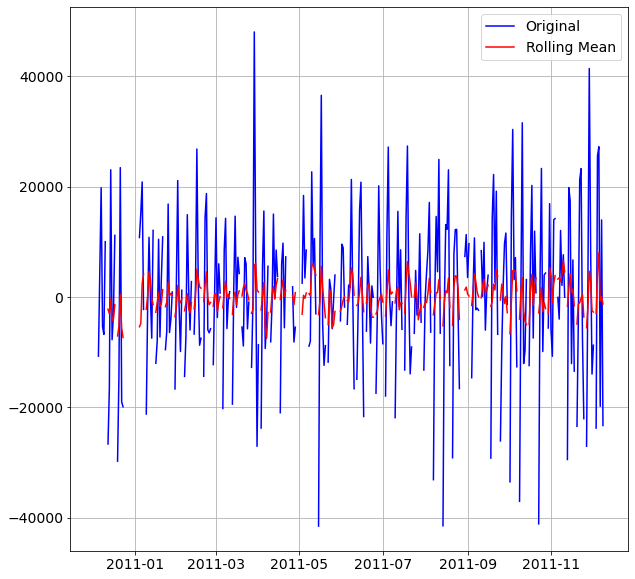

Dickey-Fuller test

H0: (timeseries) is non-stationary.
H1: (timeseries) is stationary.

ADF test statistic: -5.882568312875283
p-value: 3.05395373342483e-07
Number of lags: 15

Critical Values : 

	 1% 	 -3.453342167806272
	 5% 	 -2.871663828287282
	 10% 	 -2.572164381381345

For 0.05 significance level: 

Reject null hypothesis. This series is stationary.


In [50]:
def test_stationarity2(timeseries, check = 0.05):
      
    # Determing rolling statistics
    
    print('Rolling mean test\n')
    
    roll_mean = timeseries.rolling(window=7).mean()
    
# Plotting rolling statistics:
    plt.figure(figsize = (10,10))
    orig = plt.plot(timeseries.resample('D').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('D').mean(), color='red', label='Rolling Mean')
   
    plt.legend(loc='best')
    plt.show(block=False)

# Performing Dickey-Fuller test:

    print('Dickey-Fuller test\n')
    result = adfuller(timeseries, autolag = 'AIC')
    
    print(f'H0: (timeseries) is non-stationary.')
    print(f'H1: (timeseries) is stationary.\n')
    
    test_stat = result[0]; print(f'ADF test statistic: {result[0]}')
    pvalue = result[1]; print(f'p-value: {result[1]}')
    print(f'Number of lags: {result[2]}')    
    print('\nCritical Values : \n')
    for key, item in result[4].items(): print('\t', key, '\t', item)
    
    print(f'\nFor {check} significance level: \n')
    if pvalue < check:
        print('Reject null hypothesis. This series is stationary.')
    else:
        print('Reject null hypothesis. This series is non-stationary.')
            
# Testing stationarity of store type a
test_stationarity2(df5_workdays['Revenue'].diff(2).dropna())

**Data kita sudah stasioner**

Selanjutnya akan kita cek trend seasonalitynya menggunakan decomposition plot

# Seasonality using decomposition plot

In [51]:
# Plotting seasonality and trend
from statsmodels.tsa.seasonal import seasonal_decompose
def plot_timeseries(data):
    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    
    decomposition= seasonal_decompose(data, period = 6)
    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
     
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left'); 


Text(0.5, 1.0, 'Decomposition Plots')

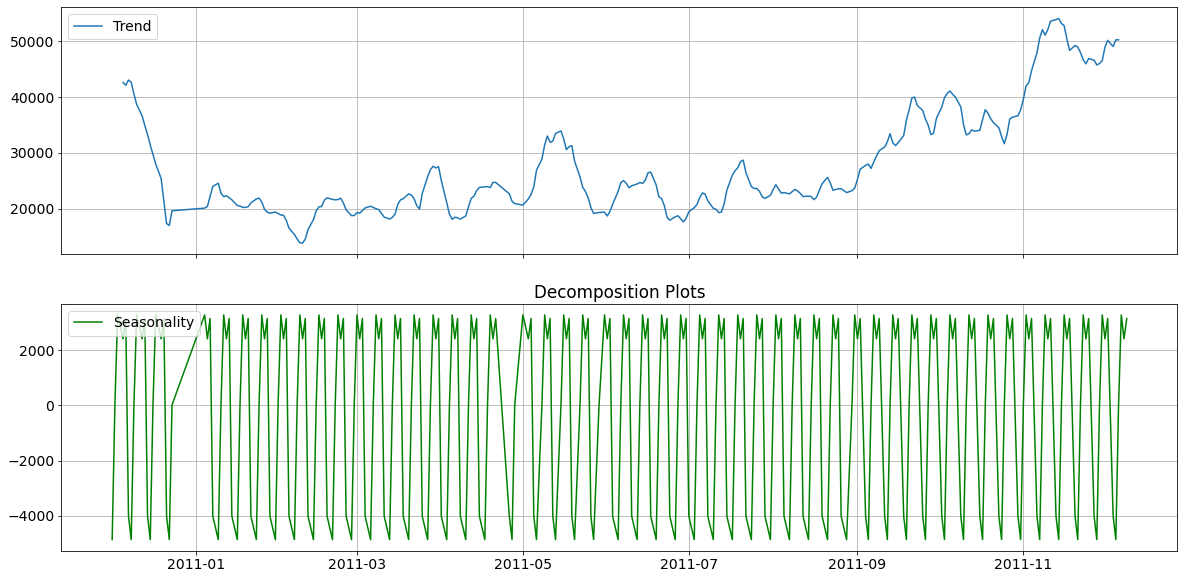

In [52]:
plot_timeseries(df5_workdays['Revenue'])
    
plt.title('Decomposition Plots')

Berdasarkan grafik di asta, dapat dilhat trend dan seasonality data kita untuk period weekly

# Modelling

Kita akan menggunakan algoritma yang paling umum digunakan untuk forecasting time series data, yaitu Seasonal ARIMA

Pada model SARIMA, diperlukan 3 parameter (p,d,q) yang masing-masing merepresentasikan seasonality, trend, dan noise. 

## AIC

Untuk memilih kombinasi parameter terbaik, kita akan menggunakan Akaike Information Criterion (AIC) score. Parameter terbaik memberikan skor AIC paling rendah. 

In [53]:
import pmdarima as pm

In [54]:
#menentukan combinasi p,d, dan q
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [55]:
Sarima_model=pm.auto_arima(df5_workdays, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=12, stepwise=True, seasonal=True, information_criterion='aic', trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6403.780, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6297.173, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6216.054, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6292.648, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=6217.498, Time=0.26 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=6217.374, Time=0.38 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6248.405, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=6218.681, Time=0.78 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=6315.177, Time=0.14 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=6217.471, Time=0.28 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=6212.140, Time=0.31 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=6294.527, Time=0.11 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=6213.623, Time=0.48 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=6213.517, Time=0.52 sec
 ARIMA(0,1,2)(1,1,0

In [56]:
#dataframe sarimax

# Fitting the data to SARIMA model 
model_sarimadf = sm.tsa.statespace.SARIMAX(df5_workdays,
                                order=(0,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sarimadf = model_sarimadf.fit()
print(results_sarimadf.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8351      0.100     -8.382      0.000      -1.030      -0.640
ma.L2         -0.0504      0.101     -0.501      0.616      -0.247       0.147
ma.S.L12      -0.6542      0.064    -10.276      0.000      -0.779      -0.529
sigma2      1.285e+08   3.44e-11   3.74e+18      0.000    1.29e+08    1.29e+08


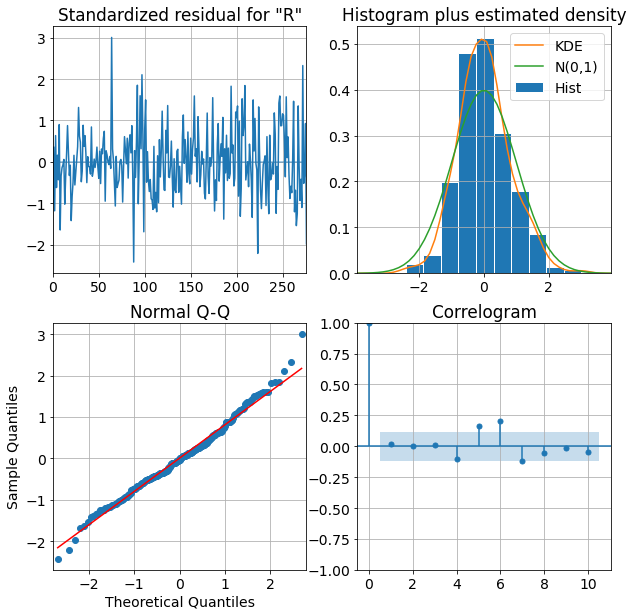

In [57]:
diagnostics = results_sarimadf.plot_diagnostics(figsize=(10,10))

The Normal Q-Q plot shows that the ordered distribution of residuals follows the distribution similar to normal distribution. Thus, our model seems to be pretty good

In [58]:
print(np.mean(np.abs(results_sarimadf.resid)))

7934.0196578668


## Prediction

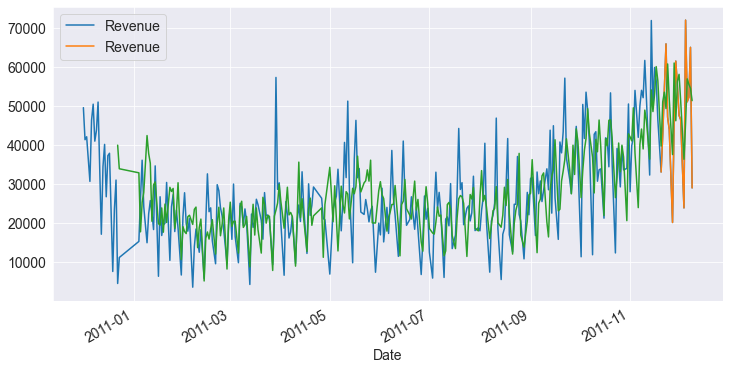

In [71]:

ecom_df = df5_workdays.copy()

# Set style for seaborn plot
sns.set_style('darkgrid')

# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()

# Default figure size
sns.mpl.rc('figure',figsize=(12, 6))

# Plot daily max temps
fig, ax = plt.subplots()
ax = ecom_df.plot(ax=ax)


# Define training and testing area
len(ecom_df) # 778 observations
train_df = ecom_df[:'2011-11-20']
test_df = ecom_df['2011-11-20':] # Last 20%

# Define start and end for prediction 
start = len(test_df)
end = len(test_df) - 1
forecast3 = results_sarimadf.predict(start=start, end=end+287, typ = 'levels')

# Plot testing data with prediction
ax = test_df.plot(ax=ax) # Orange
ax = forecast3.plot(ax=ax) # Green



In [60]:
forecast3.tail()

Date
2011-12-05    45619.664757
2011-12-06    56901.505183
2011-12-07    55528.002175
2011-12-08    54485.353049
2011-12-09    51327.242473
Name: predicted_mean, dtype: float64

In [61]:
test_df.tail()

,Revenue
Date,
2011-12-05,71979.22
2011-12-06,51032.80
2011-12-07,52187.30
2011-12-08,65001.96
2011-12-09,28921.50


# Saran & Kesimpulan

1. Penggunaan Seasonal Arima dalam melakukan prediksi / forecasting memiliki hasil yang cukup baik 
2. DIsarankan jika ingin menurunkan nilai error, bisa menggunakan hyperparamater tuning seperti XGBoost, etc